$$
\color{Coral}{
\mathbf{ 
    \Huge
     
    \text{The  Framework  to  Illistrate  Richness  v2}
}}
$$

<center>
<img src=".\Static\framework0.png">
</center>


In [1]:
import pandas as pd
import numpy as np
import math,os,sys

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style= 'darkgrid')
sns.set_context("notebook")
%matplotlib inline
%load_ext lab_black

In [5]:
from functools import wraps
from time import time

def timing(f):
    """Purely a utility function to monitor performance of the code"""
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print(f'func: {f.__name__} took: {te-ts} sec')
        return result
    return wrap

In [2]:
CSV_PATH = r"""C:\Users\M1049231\Downloads\UCI_Credit_Card.csv"""

In [3]:
raw = pd.read_csv(CSV_PATH)

<div align="center">
<p style="color:Coral;">Columns in the dataset </p>
<hr>
<p style="color:gray;">'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', </p> 
<p style="color:gray;">'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',  </p>
<p style="color:gray;">'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', </p>
<p style="color:gray;">'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6',  </p>
<p style="color:gray;">'default.payment.next.month'</p>
</div>

In [6]:
raw.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
"""DEPRICATED: 23/ 25 columns will be used as features in an idea scenario"""
# FEAT_COLUMNS = list(raw.columns.values)[1:-1] 

"""The number of unique individuals whole data is to be created for experiment"""
TOTAL_UNIQUE_INDIVIDUALS = 13000

"""the Target variable"""
TARGET_COLUMN = list(raw.columns.values)[-1]

"""Financial data"""
FEAT_COLUMN = list(raw.columns.values)[12:-1] 

"""Initialize feature importance of various features in FEAT_COLUMN"""
FEAT_WEIGHT_MAP = {col:1/len(FEAT_COLUMN) for col in FEAT_COLUMN}

In [7]:
def get_ssn(n:int, indv:int=10000):
    """Random generation of SSN in the range 1 to indv individuals """
    
    print(f"the ratio of indv to population is : {indv/n}")
    print(f"the ratio of population to  indv is : {n/indv}")
    return [np.random.randint(1,(indv+1)) for i in range(n)]

In [8]:
if 'SSN' in raw.columns:
    if input('do you want to delete SSN columns (y/n): ') == 'y':
        raw.drop('SSN',axis = 1, inplace = True)

raw.insert(0,'SSN', get_ssn(n= len(raw), indv = TOTAL_UNIQUE_INDIVIDUALS))

the ratio of indv to population is : 0.43333333333333335
the ratio of population to  indv is : 2.3076923076923075


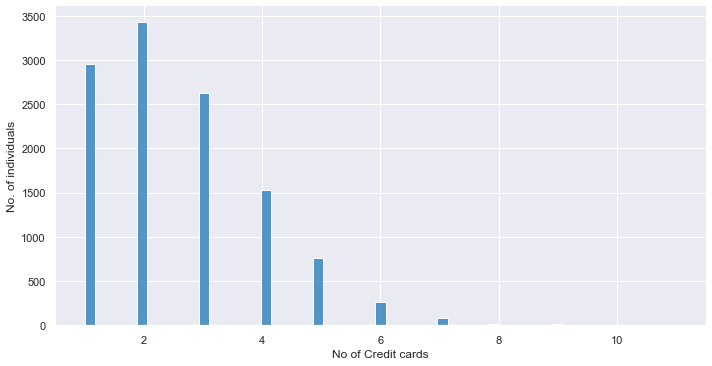

In [9]:
"""having a look at the new distribution of SSIDs. Now we have duplicate ssids which means one-to-many 
mapping between individual and no. active credit cards. we also notice that the there are 2466 individuals with 
1 card and ~3k with 2 cards. these categories represent the thin files in our dataset """

counsdf = raw.groupby('SSN').size()
g = sns.displot(counsdf , kind = 'hist', height = 5, aspect = 2)
g.set_axis_labels("No of Credit cards", "No. of individuals")

$$
\color{Coral}{
\Large 
\text{Calculating  the  richness  of  each  datapoint}
}
$$

$$

\Large 
\text{Calculating  richness  using  weights} \\
$$
$$
\begin{equation}
Weights,\quad w  \quad  \epsilon \quad  R[0,1] \\
where, \quad \sum_0^n \:  w \quad = \quad 1\\ 
\text{Representing  the total weightage of  all  the  features.}\\ \\
\end{equation}

$$

$$
\Large
\text{Establishing  features}\\
$$
$$
Features,  \quad [ \ x_{1} ,\ x_{2} ,\ ......, \ x_{n} \ ] \\
Activations,\quad  \alpha_{i} \quad =  
\begin{cases}
\ 1 & if \ x_{i} \ Exists \\ \ 0 & if \ x_{i} \ Does \ not \ Exist
\end{cases}
$$
$$

Richness, \quad \Re \quad = \quad \sum_0^n \alpha_{i} \ w_{i}

$$

$$
{In \ our \ experiment,\\
Feature \ name \quad : \quad weight \\

 \ BILL-AMT1 \ :  \  0.083~\\
  \ BILL-AMT2 \ :  \  0.083~\\
  \ BILL-AMT3 \ :  \  0.083~\\
  \ BILL-AMT4 \ :  \  0.083~\\
  \ BILL-AMT5 \ :  \  0.083~\\
  \ BILL-AMT6 \ :  \  0.083~\\
  \ PAY-AMT1 \ :  \  0.083~\\
  \ PAY-AMT2 \ :  \  0.083~\\
  \ PAY-AMT3 \ :  \  0.083~\\
  \ PAY-AMT4 \ :  \  0.083~\\
  \ PAY-AMT5 \ :  \  0.083~\\
  \ PAY-AMT6 \ :  \  0.083~\\
}
 $$

In [10]:
def _eq_row_richness(df, FEAT_COLUMN):
    """This funtion helps us assign richness to each data point in the a dataset FEAT_COLUMN 
    represents the Columns that impact our score the most, Future updates can include weights 
    illustrating the  importance of the """
    
    full_health = len(FEAT_COLUMN)
    health = sum(df[FEAT_COLUMN].values != 0)
    return(health/full_health)  

def _row_richness(df, FEAT_WEIGHT_MAP:dict):
    """This funtion helps us assign richness to each data point in the a dataset FEAT_WEIGHT_MAP 
    represents the feature weights that impact our score the most"""
    
    magnitude = 0
    for col in list(FEAT_WEIGHT_MAP.keys()):
        if df[col]!=0:
            magnitude += FEAT_WEIGHT_MAP[col]

    return magnitude.__round__(2)

In [11]:
if 'richness' in raw.columns:
    print("removed richness column, populating now...")
    raw.drop('richness',axis = 1, inplace = True)
raw.insert(1,'richness', raw.apply(_row_richness,FEAT_WEIGHT_MAP=FEAT_WEIGHT_MAP ,axis = 1))

In [12]:
def _ssn_slim_file(counsdf, slimness:int = 1):
    li = (counsdf[counsdf.values==slimness]).index.tolist()
    return li

SSN_SLIM_FILE = _ssn_slim_file(counsdf)
print(f"number of slim file SSN's : {len(SSN_SLIM_FILE)}")
slim_file_df = raw[raw['SSN'].isin(SSN_SLIM_FILE)]
print(f"number of slim files found : {len(slim_file_df)}")
assert len(SSN_SLIM_FILE) == len(slim_file_df), "check the value counts"

number of slim file SSN's : 2954
number of slim files found : 2954


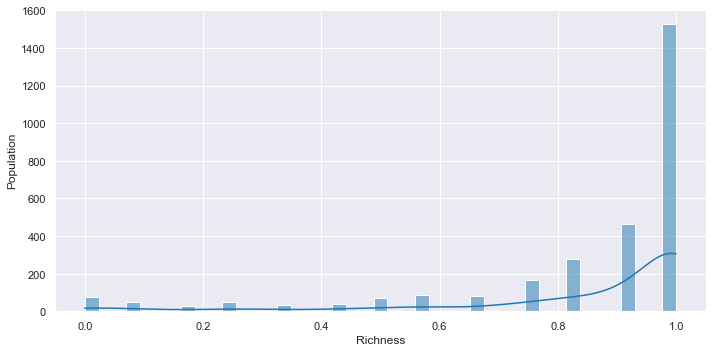

In [13]:
"""Having a look at the richness of out slim files to identify a cut of that might help
in identifying any thin files in the dataset !! ['hist', 'kde', 'ecdf'] """

g = sns.displot(slim_file_df['richness'] , kind = 'hist', height = 5, aspect = 2, kde = True)
g.set_axis_labels("Richness", "Population")

In [14]:
print(f"Files with richness less than 50% :{slim_file_df[slim_file_df['richness'] <0.5].shape[0]}")

Files with richness less than 50% :270


$$
\color{Coral}{
\Large 
\text{Having  a  look  at  the  richness  of  the  whole  population}
}

In [15]:
# list(raw.columns)

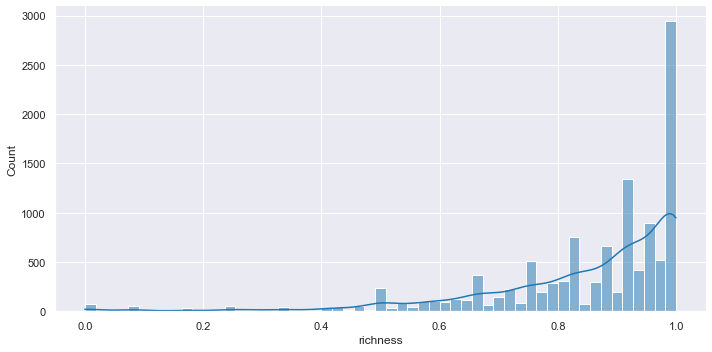

In [16]:
""" Individuals with only one credit line is considered for this experiment,_ but we can also consider individuals for 2 > too
which shows that the inactive nature of the multiple lines of credit."""

raw_richness_map = raw.groupby('SSN')['richness'].mean()
sns.displot(raw_richness_map, kind="hist", kde=True, height = 5, aspect = 2)

In [17]:
print(f"\nFiles with richness less than 50% :  {raw_richness_map[raw_richness_map<0.5].shape[0]}")


Files with richness less than 50% :  478


$$
\color{coral}{
\Large 
\text{The alternate data set}
}
$$

$$

\text{Using  quadratic  coef  to  generate  our  alternate  dataset .We  have, }  \\

ax^2 + bx + c  \quad \quad \quad - (1) \\
$$

$$

\text{The  above  given  eq,  as  two  roots  is  $ \ y_{1}$  and $ \  y_{2} $ ,   where,} \\
y = -b \ \pm \  \frac{\sqrt{(b^2) - 4ac}}{2a} \quad \quad \quad - (2) \\

\text{For the experiment a target variable $ \ y \ $ is included were, $ \quad  y \ =  \ y_{1}  -  \  y_{2} $ }

$$

In [18]:
def generate_data_quad(rows):
    x_array = []
    id = 1
    while len(x_array) < rows:
        a = float(np.random.randint(-10, 10))
        b = float(np.random.randint(-10, 10))
        c = float(np.random.randint(-10, 10))
        y = [0, 0]

        try:
            y = [
                (-b + math.sqrt((b * b) - (4 * a * c))) / (2 * a),
                (-b - math.sqrt((b * b) - (4 * a * c))) / (2 * a)]
        except (ValueError, ZeroDivisionError):
            pass

        x_array.append([id, a, b, c, abs(y[0] - y[1])])
        id += 1
    return np.array(x_array)

In [19]:
def _add_list_to_df(df:pd.DataFrame,li:list):
    
    df_ix = len(df)
    for row in li:
        df.loc[df_ix] = row
        df_ix += 1
    
    return df

In [20]:
"""Setting Some Global variables for the Alternate dataset"""
ALT_ALL_COLUMNS = ['SSN', 'a', 'b', 'c', 'y']
ALT_FEAT_COLUMNS = ALT_ALL_COLUMNS[1:] # ['x1', 'x2', 'x3', 'y']
ALT_FEAT_WEIGHT_MAP = {col:1/len(ALT_FEAT_COLUMNS) for col in ALT_FEAT_COLUMNS}

In [21]:
x = generate_data_quad(TOTAL_UNIQUE_INDIVIDUALS)
alt_df_raw = pd.DataFrame(columns=ALT_ALL_COLUMNS)
alt_df_raw = _add_list_to_df(alt_df_raw, x)
alt_df_raw.SSN = alt_df_raw.SSN.astype('int32')

In [22]:
alt_df_raw.head()

,SSN,a,b,c,y
0,1,9.0,1.0,9.0,0.000000
1,2,4.0,6.0,-10.0,3.500000
2,3,5.0,7.0,-8.0,2.891366
3,4,6.0,-3.0,-4.0,1.707825
4,5,-10.0,-9.0,9.0,2.100000


['x1', 'x2', 'x3', 'y']

<AxesSubplot:xlabel='y', ylabel='Density'>

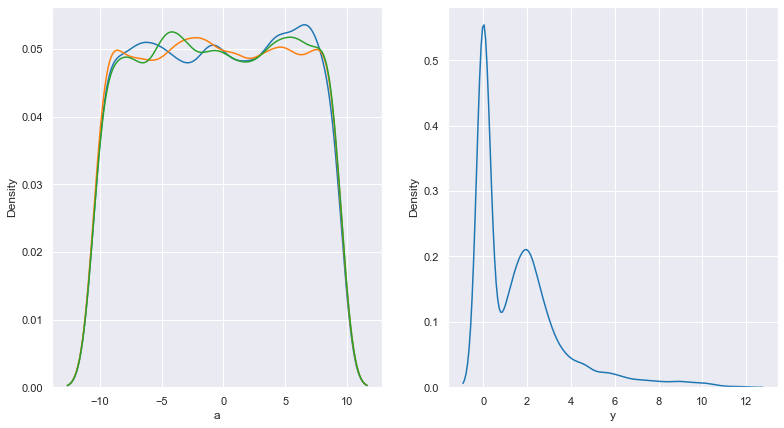

In [23]:
fig,ax = plt.subplots(1,2,figsize=(13, 7))
for i in ALT_FEAT_COLUMNS[:-1]: # [ 'x1', 'x2', 'x3']
    sns.kdeplot(alt_df_raw[i], ax = ax[0])
sns.kdeplot(alt_df_raw.y, ax = ax[1])

In [24]:
def _induce_null(col:list, df:pd.DataFrame, prob = 10):
    for i in range(len(col)):
        rand = np.random.randint(0,100)
        if rand>prob:
            df[col[i]] = 0
    return df

In [25]:
if 'alt_richness' in alt_df_raw.columns:
    print("removed alt_richness column, populating now...")
    alt_df_raw.drop('alt_richness',axis = 1, inplace = True)

alt_df_raw.insert(1,'alt_richness', alt_df_raw.apply(_row_richness,FEAT_WEIGHT_MAP=ALT_FEAT_WEIGHT_MAP ,axis = 1))

In [26]:
alt_df_raw.head()

,SSN,alt_richness,a,b,c,y
0,1,0.75,9.0,1.0,9.0,0.000000
1,2,1.00,4.0,6.0,-10.0,3.500000
2,3,1.00,5.0,7.0,-8.0,2.891366
3,4,1.00,6.0,-3.0,-4.0,1.707825
4,5,1.00,-10.0,-9.0,9.0,2.100000


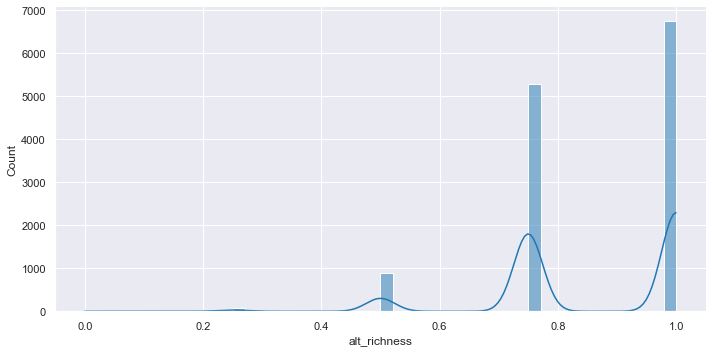

In [27]:
alt_ssn_richness = alt_df_raw.groupby('SSN')['alt_richness'].mean()
sns.displot(alt_ssn_richness, kind="hist", kde=True,height = 5, aspect = 2)

In [28]:
print(f"Files with alt_richness less than 50% :  {alt_ssn_richness[alt_ssn_richness<0.5].shape[0]}")

Files with alt_richness less than 50% :  85


In [29]:
type(alt_ssn_richness)

pandas.core.series.Series

$$
\color{coral}{
\Large 
\text{The Full Picture}
}

In [30]:
from functools import partial

In [31]:
def _merge_weighted_richness(df_raw, alt_ssn_map:dict, alt_col:str = "alt_richness", raw_col:str = "richness", weightage:dict={"raw":0.5,"alt":0.5}):
    res = alt_ssn_map[df_raw['SSN']]*weightage['alt'] + df_raw[raw_col]*weightage['raw']
    return [df_raw['SSN'], df_raw[raw_col], res] # ['SSN',"baseline_richness","new_richness"]

def generate_weighted_richness_wrapper(raw,alt_ssn_richness):
    res = []
    generate = partial(_merge_weighted_richness, alt_ssn_map=alt_ssn_richness.to_dict())
    for i in raw.index:
        res.append(generate({'SSN':i,'richness':raw[i]}))
    return res


''

In [32]:
_ = generate_weighted_richness_wrapper(raw = raw_richness_map, alt_ssn_richness=alt_ssn_richness)
merged_richness = pd.DataFrame(_, columns= ['SSN',"baseline_richness","new_richness"])


Text(0.5, 1.0, 'The Full Picture')

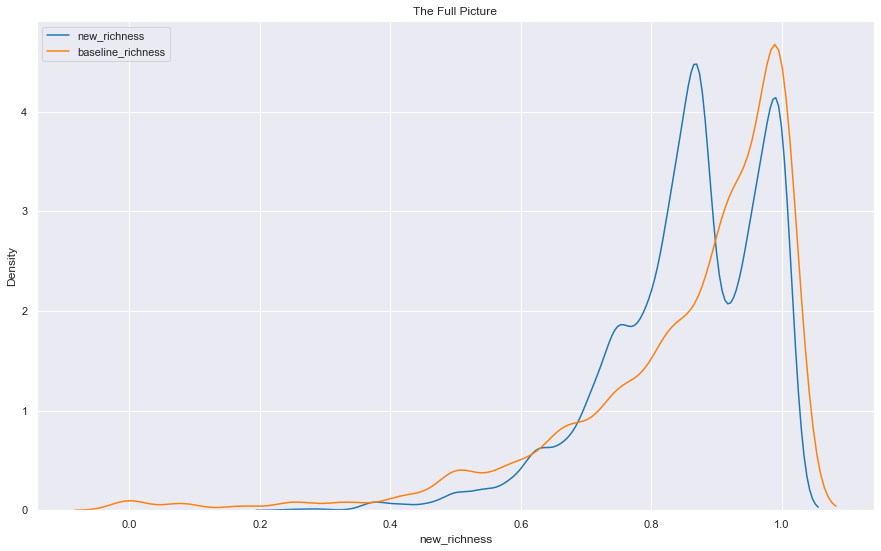

In [33]:
plt.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(figsize=(15, 9),)
sns.kdeplot(merged_richness["new_richness"], ax = ax,)
sns.kdeplot(merged_richness["baseline_richness"], ax = ax,)
plt.legend(["new_richness","baseline_richness"], loc = "upper left")
plt.title("The Full Picture")

In [34]:
print(f"Files with BASELINE richness less than 50% :  {raw_richness_map[raw_richness_map<0.5].shape[0]}")
print(f"Files in MERGED dataset with richness less than 50% :{merged_richness[merged_richness['new_richness'] <0.5].shape[0]}")

Files with BASELINE richness less than 50% :  478
Files in MERGED dataset with richness less than 50% :124


$$
\text{Established Cutoff for richness : 50%}\\
$$
$$
\text{Individuals Below the Cutoff,}\\
\text{Baseline Dataset : } \ \color{coral}{478}\\
\text{Merged Dataset : } \ \color{coral}{124}\\
$$
$$
\text{Enrichment of} \ \mathit{Thin \ Files}\ \text{in  the Baseline dataset using ALT data : }
( \ 1 \ - \ \frac{124}{478} \ ) \ * \ 100 \ = \color{coral}{\ 74 \ \text{%}}

$$